# Does You Look Like

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from bing_image_downloader.downloader import download
import face_recognition
from PIL import Image, ImageOps
import pickle
import json
from tqdm import tqdm
from glob import glob

In [2]:
# download_pics
celebs_women = ['Angelina Jolie', 'Helena Bonham Carter', 'Jennifer Aniston', 'Julia Roberts', 'Kate Beckinsale', 
              'Keira Knightley', 'Lindsey Stirling', 'Marilyn Monroe', 'Monica Bellucci', 'Lucy Liu', 'Scarlett Johansson']

path_to_images_dir = os.path.abspath(os.path.join('E:', os.path.sep, 'image'))
size_new = 256
limit_load_image = 15

In [3]:
def download_images(path_to_images_dir: str, actors: list, limit_load: int=15) -> None:
    '''
    Загрузка изображений указанных актёров/актрис
    
    :param path_to_images_dir: путь для сохранения изображений на сервере
    :param actors: список актёров/актрис
    :param limit_load: количество изображений для загрузки
    
    :return: None
    '''
    
    # проверка наличия каталогов с изображениями
    # удаление в случае нахождения
    try:
        shutil.rmtree(path_to_images_dir)
        print('Дерево каталогов удалено')
    except OSError as e:
        print('Error: %s : %s' % (path_to_images_dir, e.strerror))

    # загрузка изображений из Bing
    for name_actor in tqdm(actors):
        #output_dir_path = os.path.join(path_to_images, findCeleb)
        find_string = f'face {name_actor}'
        download(find_string, limit=limit_load,  output_dir=path_to_images_dir,
                 adult_filter_off=True, force_replace=False, timeout=60, verbose=False)
        
        # переименование каталогов с загруженными изображениями
        rename_dir(path_to_images_dir, find_string, name_actor)
        
        # подсчёт количества загруженных изображений по каждому запросу
        # с удалением при количестве < 2
        if count_files_in_dir(path_to_images_dir, name_actor):
            actors.remove(name_actor)

        
def rename_dir(path_dir: str, name_old: str, name_new: str) -> None:
    '''
    Переименование каталога
    
    :param path_dir: путь хранения каталогов
    :param name_old: старое имя каталога
    :param name_new: новое имя каталога
    
    :return: None        
    '''
    
    path_old = os.path.join(path_dir, os.path.sep, name_old)
    path_new = os.path.join(path_dir, os.path.sep, name_new)
    os.rename(path_old, path_new) 

    
def count_files_in_dir(path_dir: str, name_dir: str) -> bool:
    '''
    Оценка количества файлов в каталогах
    
    :param path_dir: путь хранения каталогов
    :param name_dir: наименование проверяемого каталога
    
    :return: True (if < 2) / False
    '''
    
    path_glob = os.path.join(path_dir, os.path.sep, name_dir)
    files = len(glob(path_glob))
    if files < 2:
        return True
    return False

In [4]:
def resize_photo(image: Image, size_new: int) -> Image:
    '''
    Изменение размера изображения
    :param image: исходное изображение
    :param size_new: необходимый размер изображения по одной из сторон
    
    :return: финальное изображение, массив numpy
    '''
    
    # получение размера исходного изображения
    size = image.size
    
    # рассчёт коэффициента по одной из сторон
    coef = size_new / size[0]
    first_side = int(size[0] * coef)
    second_side = int(size[1] * coef)
    
    # изменение размера изображения
    resized_image = image.resize((first_side, second_side))
    resized_image = resized_image.convert('RGB')
    return resized_image

In [5]:
def reformat_photo(path_to_images_dir: str, actors: list, size_new: int) -> None:
    '''
    Изменение размера всех изображений
    :param path_to_images_dir: путь до каталогов с изображениями
    :param actors: список актёров/актрис
    :param size_new: необходимый размер изображения по одной из сторон
    
    :return: None
    '''
    
    for name in actors:
        path_to_images = os.path.join(path_to_images_dir, name)
        images = os.listdir(path_to_images)
        for img in images:
            path_image = os.path.join(path_to_images, img)
            # изменение формата изображения и сохранения под тем же именем
            with Image.open(path_image) as photo:
                photo_resized = resize_photo(photo, size_new)
                photo_resized_conv = photo_resized.convert('RGB')
                photo_resized_conv.save(path_image)

In [ ]:
#--------------------------------------------------------------------------------------------------------------------#

In [7]:
path_image = os.path.join(path_to_images, 'face Helena Bonham Carter')
with Image.open(os.path.join(path_image, 'Image_1.jpg')) as img:
    newImRes = resize_photo(img, 256)
    newImRes

In [12]:
type(newImRes)

PIL.Image.Image

In [55]:
img_resized.show()

In [67]:
new_img = Image.new("RGBA", img_resized.size)
new_img = new_img.paste(img_resized)
new_img

In [114]:
img_resized = mpimg.imread(os.path.join(path_image, 'Image_1.jpg'))

In [121]:
def rgb2gray(rgb):
    ''' Берётся среднее трёх цветов RGB'''
    tile = np.tile(np.c_[0.5, 0.5, 0.5], reps=(rgb.shape[0],rgb.shape[1],1))
    #print((tile*rgb)[:3])
    return np.sum(tile * rgb, axis=2)

In [122]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg

img_gray = rgb2gray(img_resized)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()

ValueError: operands could not be broadcast together with shapes (2048,2048,3) (2048,2048) 

In [49]:
img_resized.convert('RGB').save(os.path.join(path_image, 'Image_1_resized_convert.jpg'))

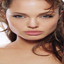

In [12]:
import glob
path_to_images = os.path.abspath(os.path.join('E:', os.path.sep, 'image'))
person = 'Angelina Jolie'
len(glob.glob(f'{path_to_images}/{person}/*'))

4

In [13]:
os.listdir(f'{path_to_images}/{person}')

['Image_1.jpg', 'Image_1_resized.jpg', 'Image_2.jpg', 'Image_3.jpg']

In [14]:
face = face_recognition.load_image_file(f'{path_to_images}/{person}/Image_1.jpg')
face_boxes = face_recognition.face_locations(face)

In [15]:
face_boxes

[(692, 1401, 1491, 603)]

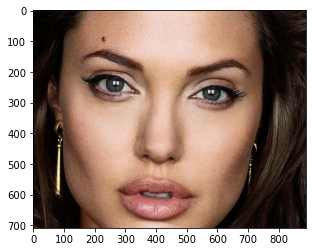

In [17]:
from matplotlib.pyplot import imshow
cropped = face[692:1401, 603:1491]
imshow(cropped)

In [27]:
face_enc = face_recognition.face_encodings(face)

In [28]:
face_enc

[array([-1.12827025e-01,  7.67466724e-02,  1.64657086e-01, -3.39474566e-02,
        -1.26380026e-01, -7.18563050e-02, -8.86288881e-02, -1.24554984e-01,
         2.18204767e-01, -1.13290012e-01,  1.68888226e-01, -4.46561165e-02,
        -3.36703092e-01,  7.44490325e-02, -1.13264188e-01,  1.92403495e-01,
        -1.44172996e-01, -1.49913967e-01, -7.45695084e-02, -4.69338074e-02,
         1.00183271e-01,  1.29205082e-02, -2.16643289e-02,  1.00735463e-01,
        -1.46752164e-01, -3.52994919e-01, -1.26146749e-01,  2.24244408e-02,
        -9.68301371e-02, -1.42883897e-01,  1.51390005e-02,  1.24936745e-01,
        -1.94369987e-01, -1.02408044e-03, -6.16435781e-02,  1.57695696e-01,
        -1.07169729e-02, -1.77296162e-01,  5.73471561e-02,  5.99456616e-02,
        -2.82665789e-01, -1.18677892e-01,  8.72914046e-02,  2.67181486e-01,
         1.96720704e-01, -1.28256800e-02,  7.35943764e-02, -6.91013262e-02,
         6.43815622e-02, -2.84123749e-01,  5.48034832e-02,  1.98608190e-01,
         4.3

In [ ]:
len(face_enc)

In [ ]:
embedings = np.empty(128)
embedings = np.vstack((embedings, face_enc))

In [ ]:
with open (f'{path_to_images}/{person}/embedings.pkl', 'wb') as f:
    pickle.dump(embedings, f)

In [ ]:
os.listdir('E:\\image/Angelina Jolie')

In [ ]:
with open (f'{path_to_images}/{person}/embedings.pkl', 'rb') as f:
    new_embedings = pickle.load(f)
new_embedings